## Здравствуйте, меня зовут *Дарья Петренко*, вот моё Задание №1 по курсу ПСАД-2020!

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [3]:
from scipy.stats import linregress

def draw_linear(x, y, x_name='', y_name=''):
    "Scatter x-y points and draw a LR line."
    slope, intercept, r, _, _ = linregress(x, y)
    x_lims = np.array([x.min() - 1, x.max() + 1])
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot(x, y, 'g+', label='Objects')
    plt.plot(x_lims, intercept + slope * x_lims, 'r--', label=r"LR line with $\rho \approx {:.3f}$".format(r))
    plt.legend()
    plt.show()

In [4]:
from sklearn.metrics import confusion_matrix

def draw_cm(x_bin, y_bin, x_name='', y_name=''):
    "Draw a confusion matrix for binary 1-D arrays x_bin and y_bin."
    cm = confusion_matrix(x_bin, y_bin)
    plt.matshow(cm)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [5]:
from itertools import combinations
from collections import defaultdict

def apply_pair_statistics(S, pair_statistics, statistics_names):
    """Apply pair statistics to each pair in a dataset S 
    and return a DataFrame containing the results.
    
    Parameters
    ----------
    S: array of shape (N, D)
        A dataset numpy array.
    pair_statistics: list of callables
        A list of statistics -- functions requiring two array arguments (x and y) 
        and returning a number (statistic's value)
    statistics_names: list of strings
        A list of statistics names.
    """
    res = defaultdict(list)

    for i, j in combinations(range(S.shape[1]), 2):
        x_name, y_name = f'X{i+1}', f'X{j+1}'
        x, y = S.T[i], S.T[j]
        res["Pair"].append(x_name + ' - ' + y_name)
        for statistic, name in zip(pair_statistics, statistics_names):
            res[name].append(statistic(x, y))

    res = pd.DataFrame(res)
    return res

## Итак...

Пусть задана обучающая выборка $\widetilde{S}$, включающая значения переменных $X_1, \dots, X_4$.

In [6]:
S = np.load('data', allow_pickle=True)

### Задача 1  

Вычислите для каждой пары переменных коэффициент корреляции Пирсона.

In [7]:
def pearson(x, y):
    "Calculate a Pearson correlation coefficient given 1-D data arrays x and y."
    cent_x = x - x.mean()
    cent_y = y - y.mean()
    return np.sum(cent_x * cent_y) / np.sqrt(np.sum(cent_x ** 2) * np.sum(cent_y ** 2))

res_pearson = apply_pair_statistics(S, [pearson], ['Pearson'])
res_pearson

,Pair,Pearson
0,X1 - X2,0.717535
1,X1 - X3,0.214944
2,X1 - X4,0.179368
3,X2 - X3,0.388575
4,X2 - X4,0.352562
5,X3 - X4,0.873796


Сопоставьте каждой из переменных  $X_1,\dots,X_4$  соответствующую порядковую переменную.

In [21]:
def rank(x):
    "Assign ranks to data and return the resulting ranking array."
    unique, counts = np.unique(x, return_counts=True)
    order = x.argsort()
    ranks = order.argsort().astype(np.float) + 1
    for num in unique[(counts - 1).astype(np.bool)]:
        ranks[x == num] = np.mean(ranks[x == num])
    return ranks
        

S_r = np.array([rank(x) for x in S.T]).T

Вычислите для каждой из пар переменных коэффициенты корреляции Спирмена и Кендалла ($\tau$-коэффициент).

In [31]:
from itertools import combinations

In [51]:
def spearman(x_r, y_r):
    "Calculate a Spearman correlation coefficient given 1-D ranking arrays x_r and y_r."
    n = x_r.shape[0]
    return 1 - 6 / (n ** 3 - n) * np.sum((x_r - y_r)**2)

def kendall(x_r, y_r):
    "Calculate a Kendall tau correlation coefficient given 1-D ranking arrays x_r and y_r."
    n = x_r.shape[0]
    N = 0 
    N_abs = 0
    N_x = 0
    N_y = 0
    for i, j in combinations(range(n), r=2):
        curr_sign = np.sign((x_r[i] - x_r[j]) * (y_r[i] - y_r[j]))
        if curr_sign:
            N += np.sign((x_r[i] - x_r[j]) * (y_r[i] - y_r[j]))
            N_abs += 1
        else:
            if x_r[i] != x_r[j]:
                N_y += 1
            elif y_r[i] != y_r[j]:
                N_x += 1
    return N / np.sqrt((N_abs + N_x) * (N_abs + N_y))

res_ranked = apply_pair_statistics(S_r, [spearman, kendall], ['Spearman', 'Kendall'])
res_ranked

,Pair,Spearman,Kendall
0,X1 - X2,0.999789,0.996545
1,X1 - X3,0.068771,0.050911
2,X1 - X4,0.047122,0.038293
3,X2 - X3,0.070294,0.052847
4,X2 - X4,0.048370,0.041470
5,X3 - X4,0.819549,0.650535


Посмотрите на общую таблицу результатов и на графики ниже, сделайте выводы. 

При желании можно построить свои графики / вывести дополнительные результаты.

In [54]:
res_final = pd.merge(res_pearson, res_ranked)
res_final

,Pair,Pearson,Spearman,Kendall
0,X1 - X2,0.717535,0.999789,0.996545
1,X1 - X3,0.214944,0.068771,0.050911
2,X1 - X4,0.179368,0.047122,0.038293
3,X2 - X3,0.388575,0.070294,0.052847
4,X2 - X4,0.352562,0.048370,0.041470
5,X3 - X4,0.873796,0.819549,0.650535


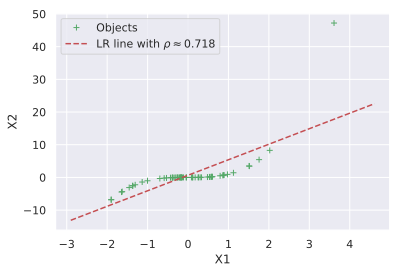

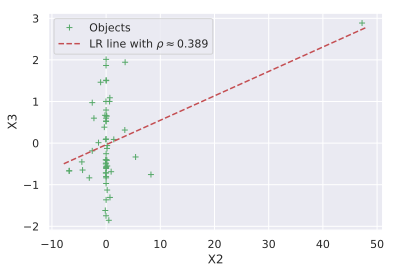

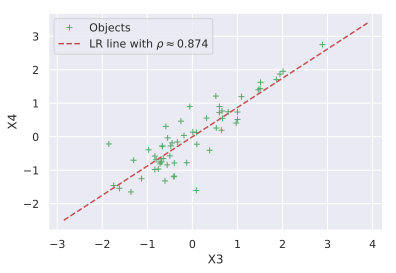

In [55]:
draw_linear(S.T[0], S.T[1], 'X1', 'X2')
draw_linear(S.T[1], S.T[2], 'X2', 'X3')
draw_linear(S.T[2], S.T[3], 'X3', 'X4')

**Выводы:** 
* коэффициент Пирсона измеряет лишь линейные зависимости, а коэффициенты Спирмена и Кендалла - любые монотонные. Это подтверждается результатами эксперимента для пары X1-X2: на графике отчетливо видна нелинейная зависимость переменных, и коффициенты Спирмена и Кендалла близки к 1. А коэффициент Пирсона меньше по модулю и соответствует линеаризации этой зависимости. 
* коэффициент Пирсона очень неустойчив к выбросам (см график X3(X2))
* коэффициенты, использующие ранги векторов вместо исходных значений, более устойчивы к выбросам (видно, что зависимость X3(X2) близка к константному нулю, и коэффициенты Спирмена и Кендалла соответствуют этому случаю, в то время как значение коффициента Пирсона сильно отличается из-за одного выброса)

### Задача 2


Бинаризуйте выборку $\widetilde{S}$ по медиане.

In [20]:
S_bin = (S > np.median(S, axis=0)).astype(int)

Вычислите для каждой пары бинаризованных переменных коэффициенты близости Жаккарда и $\phi$.

In [29]:
def jaccard(x_bin, y_bin):
    "Compute the Jaccard coefficient given 1-D boolean arrays x_bin and y_bin."
    sum_xy = x_bin + y_bin
    a = np.sum(sum_xy == 2)
    b_c = np.sum(sum_xy == 1)
    return a / (a + b_c)

def phi(x_bin, y_bin):
    "Compute the phi coefficient given 1-D boolean arrays x_bin and y_bin."
    sum_xy = x_bin + y_bin
    a = np.sum(sum_xy == 2)
    d = np.sum(sum_xy == 0)
    b = np.sum((sum_xy == 1) * x_bin)
    c = np.sum((sum_xy == 1) * y_bin)

    return (a * d - b * c) / np.sqrt((a + b) * (c + d) * (b + d) * (a + c))

res_bin = apply_pair_statistics(S_bin, [jaccard, phi], ['Jaccard', 'Phi'])
res_bin

,Pair,Jaccard,Phi
0,X1 - X2,1.000000,1.000000
1,X1 - X3,0.302326,-0.052956
2,X1 - X4,0.365854,0.087438
3,X2 - X3,0.302326,-0.052956
4,X2 - X4,0.365854,0.087438
5,X3 - X4,0.750000,0.719212


Сделайте выводы по полученным результатам и приведённым ниже матрицам ошибок.

При желании можно построить свои графики / вывести дополнительные результаты.

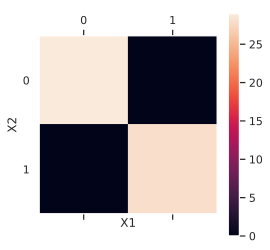

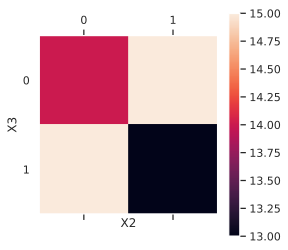

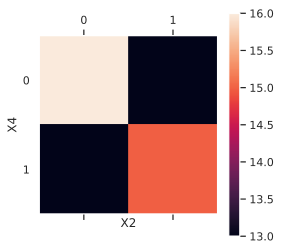

In [41]:
draw_cm(S_bin.T[0], S_bin.T[1], 'X1', 'X2')
draw_cm(S_bin.T[1], S_bin.T[2], 'X2', 'X3')
draw_cm(S_bin.T[1], S_bin.T[3], 'X2', 'X4')

**Выводы:**
* Для пары переменных X1-X2 сумма внедиагональных элементов матрицы ошибок = 0, поэтому значения коэффициентов фи и Жаккарда совпадают и равны 1
* Коэффициент Жаккарда, в отличие от фи, учитывает только единицы, что подходит для оценки зависимости бинарных векторов только в некоторых конкретных задачах (если не важны случаи, когда обе переменные = 0). В общем случае коэффициент Жаккарда может принимать не соответствующие реальной связи переменных значения (можно добавить в выборку сколько угодно пар (0, 0), и значение коэффициента не поменяется). В эксперименте с переменными X2-X4 значения матрицы ошибок почти совпадают, следовательно, в данных почти нет никакой зависимости. Коэфициент фи соответствует этому рассуждению и близок к 0, в то время как коэффициент Жаккарда принимает довольно большое по модулю значение. Аналогичная ситуация с переменными X2-X3.


### Задача 3

#### Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [4]:
rats = pd.read_table("rats.txt", sep="\t")
rats.sample(5)

,lifespan,diet
172,764,ad libitum
32,906,restricted
35,923,restricted
6,389,restricted
68,1120,restricted


In [5]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan']
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan']

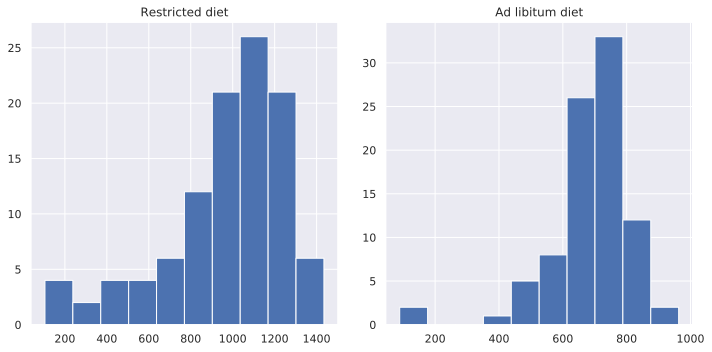

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Restricted diet')
plt.hist(x1)
plt.subplot(1, 2, 2)
plt.title('Ad libitum diet')
plt.hist(x2)
plt.tight_layout()

1. Нарисуйте один график с двумя boxplot на нем (для каждой из диет). Укажите на графике 95% доверительный интервал для каждой из медиан. В этом вам поможет функция boxplot(..., notch=TRUE), которой первым аргументом можно передать объект типа формула.

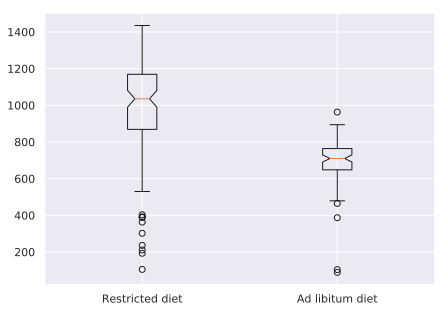

In [15]:
plt.figure(figsize=(7, 5))
plt.boxplot([x1, x2], labels=['Restricted diet', 'Ad libitum diet'], notch=True);

### Нормальность

2. Проверим нормальность двух выборок (для каждой из диет). Для этого нарисуйте qq-график и отметьте на нем прямую линию, соответствующую идеальным теоретическим квантилям нормального распределения. Похожи ли данные на нормальное распределение?

In [16]:
from statsmodels.graphics.gofplots import qqplot

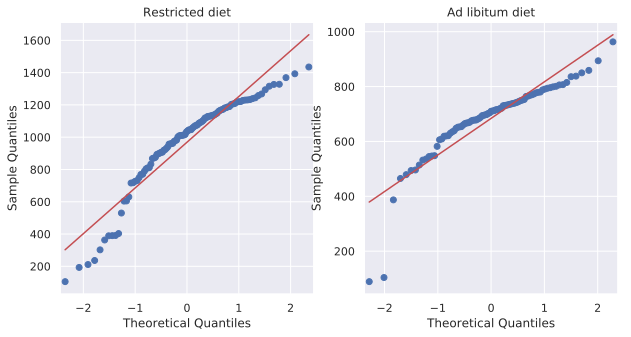

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(x1, line='s', ax=ax[0])
ax[0].set_title('Restricted diet')

qqplot(x2, line='s', ax=ax[1])
ax[1].set_title('Ad libitum diet');

Данные не очень похожи на нормальное распределение.

3. Попробуйте исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой) и снова нарисовать qq-графики. Можно ли применять к этим данным критерии, основанные на предположении о нормальности?

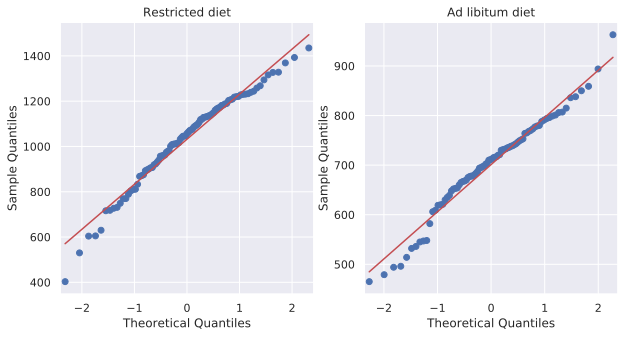

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

qqplot(x1[x1 > 400], line='s', ax=ax[0])
ax[0].set_title('Restricted diet')

qqplot(x2[x2 > 400], line='s', ax=ax[1])
ax[1].set_title('Ad libitum diet');

Усечённые выборки можно считать практически нормальными. К ним можно применять критерии, основанные на предположении о нормальности (например, критерий Стьюдента).

### Сравнение средних

Проверьте нулевую гипотезу

$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

против следующих альтернатив:

$H_1$: крысы на строгой диете живут дольше.

$H_1$: средняя продолжительность жизни крыс меняется при ограничении диеты. 

Проверить правильность вычислений вы можете с помощью библиотечной функции `scipy.stats.ttest_ind`, которая реализует двусторонний критерий Стьюдента для двух независимых выборок.

In [96]:
from scipy.stats import t

In [109]:
x1_cut = x1[x1 > 400]
x2_cut = x2[x2 > 400]

In [110]:
def find_T_nu(x1, x2):
    x1_mean = x1.mean()
    x2_mean = x2.mean()

    n1 = x1.shape[0]
    n2 = x2.shape[0]

    S1 = np.sum((x1 - x1_mean) ** 2) / (n1 - 1)
    S2 = np.sum((x2 - x2_mean) ** 2) / (n2 - 1)

    T = (x1_mean - x2_mean) / np.sqrt((S1 / n1 + S2 / n2))
    nu = (S1 / n1 + S2 / n2) ** 2 / (S1 ** 2 / (n1 ** 2 * (n1 - 1)) + S2 ** 2 / (n2 ** 2 * (n2 - 1)))
    
    return T, nu

In [111]:
T, nu = find_T_nu(x1_cut, x2_cut)

В случае, когда H1: крысы на строгой диете живут дольше,то есть mu_1 > mu_2

In [114]:
p_val = 1 - t.cdf(T, nu)
p_val

0.0

Значение < 0.025, поэтому гипотеза H0 отвергается, принимаем гипотезу H1.

В случае, когда H1: средняя продолжительность жизни крыс меняется при ограничении диеты, то есть mu_1 != mu_2

In [116]:
p_val = 2 * min(1 - t.cdf(T, nu), t.cdf(T, nu))
p_val

0.0

Значение < 0.05, поэтому гипотеза H0 отвергается, принимаем гипотезу H1.